# Udacity Navigation Project Submission

* This notebook contains the code to run and evaluate an agent which learns using the double DQN algorithm. 


* The following files contain the main body of code:
  * navigation.py          : Contains the train and run functions.
  * src/double_dqn_agent.py: Contains the double DQN algorithm implementation
  * src/model.py           : Contains the neural network implemented using PyTorch.


* In addition, an agent using the  DQN algorithm can be found in
  * src/dqn_agent.py    


* The weights of the trained neural network can be found in
  * model.pt


* The weights of the target neural network can be found in
 * model_target.pt


* Details of setting up the environment can be found in:
  * README.md


* Details of the double DQN algorithm can be found in: 
  * REPORT.md

## Importing the necessary modules

In [16]:
import pdb
import numpy      as np
import navigation as nav
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the unity environment

In [ ]:
### Load the unity environment
from unityagents import UnityEnvironment
env    = UnityEnvironment(file_name="Banana.app")

ERROR:root:Exception calling application: Ran out of input
Traceback (most recent call last):
  File "/Users/myunt/anaconda3/envs/drlnd/lib/python3.6/site-packages/grpc/_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "/Users/myunt/anaconda3/envs/drlnd/lib/python3.6/site-packages/unityagents/rpc_communicator.py", line 26, in Exchange
    return self.child_conn.recv()
  File "/Users/myunt/anaconda3/envs/drlnd/lib/python3.6/multiprocessing/connection.py", line 251, in recv
    return _ForkingPickler.loads(buf.getbuffer())
EOFError: Ran out of input


## Training 

* The agent is trained using the double DQN algorithm
* The maximum number of episodes can be specified using    the `num_episodes`    parameter
* The minimum desired average score can be specified using the `min_performance` parameter
* The number of recent scores used in computing the average can be specified using the `window_size` parameter


In [4]:
### Train the agent
###
num_episodes,  avg_scores, scores = nav.train(  env
                                           , num_episodes = 1800 
                                           , min_performance = 3
                                           , window_size     = 100  )


Number of agents: 1
Number of actions: 4
States have length: 37
Episode: 51 Score:  0.00 average score: 2.35  over episodes: 51
 Environment solved in 73 episodes! 	Average Score: 3.03


## Plotting the Scores and Average Scores

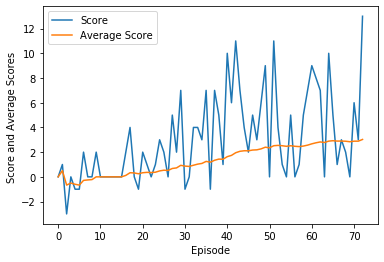

In [10]:
### Plot the reward and the average reward
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(avg_scores)), avg_scores)
plt.ylabel('Score and Average Scores ')
plt.xlabel('Episode')
plt.legend(['Score', 'Average Score'], loc = 'upper left')
plt.show()


## Evaluate the Agent

In [14]:
# Run the trained agent one more time with the saved weights
score = nav.run(env, num_episodes = 1, local_filename = 'model.pt')
print("""The score for the run is: {:d}""".format(int(score[0])))

The score for the run is: 10


## Close the Environment

In [ ]:
env.close()